In [1]:
import xarray as xr
import matplotlib.pyplot as plt

from atomic_ocean_waves import read_data


TODO:

- [x]  read in SWIFT data
- [x]  read in WSRA data
- [x]  read in P3 data
- [x]  read in Saildrone data
- [ ]  read in R/V Ron Brown ship data
- [ ]  read in Wave Glider data
- [ ]  read in WW3 data
- [ ]  read in Riegl data

In [2]:
wsra_ds = read_data.read_wsra_directory(directory='../data/WSRA/')

In [3]:
swift_ds = read_data.read_swift_directory(directory='../data/SWIFT/')

In [4]:
swift_ds

<xarray.Dataset> Size: 16MB
Dimensions:                                                               (
                                                                           id: 6,
                                                                           time: 500,
                                                                           freq: 42,
                                                                           z: 96,
                                                                           zHR: 64)
Coordinates:
  * time                                                                  (time) datetime64[ns] 4kB ...
  * freq                                                                  (freq) float64 336B ...
  * z                                                                     (z) float64 768B ...
  * id                                                                    (id) object 48B ...
  * zHR                                                                   (zHR) float64 512B ...
Data variables: (12/36)
    lat                                                                   (id, time) float64 24kB dask.array<chunksize=(1, 454), meta=np.ndarray>
    lon                                                                   (id, time) float64 24kB dask.array<chunksize=(1, 454), meta=np.ndarray>
    sea_water_temperature                                                 (id, time) float64 24kB dask.array<chunksize=(1, 454), meta=np.ndarray>
    sea_water_salinity                                                    (id, time) float64 24kB dask.array<chunksize=(1, 454), meta=np.ndarray>
    sea_water_temperature_at_depth                                        (id, time) float64 24kB dask.array<chunksize=(1, 454), meta=np.ndarray>
    sea_water_salinity_at_depth                                           (id, time) float64 24kB dask.array<chunksize=(1, 454), meta=np.ndarray>
    ...                                                                    ...
    relative_humidity                                                     (id, time) float64 24kB dask.array<chunksize=(1, 459), meta=np.ndarray>
    east                                                                  (id, z, time) float64 2MB dask.array<chunksize=(1, 40, 459), meta=np.ndarray>
    north                                                                 (id, z, time) float64 2MB dask.array<chunksize=(1, 40, 459), meta=np.ndarray>
    tkedissipationrateHR                                                  (id, zHR, time) float64 2MB dask.array<chunksize=(1, 64, 459), meta=np.ndarray>
    specific_humidity                                                     (id, time) float64 24kB dask.array<chunksize=(1, 459), meta=np.ndarray>
    flag_values_humidity                                                  (id, time) float64 24kB dask.array<chunksize=(1, 459), meta=np.ndarray>
Attributes: (12/22)
    creation_date:        ['13-May-2022 14:33:17' '13-May-2022 14:33:18' '13-...
    creator:              Suneil Iyer (APL-UW), Elizabeth Thompson (NOAA PSL)...
    please_acknowledge::  four investigators above
    institution:          Applied Physics Laboratory at the University of Was...
    contact_email_1:      iyersk@uw.edu
    contact_email_2:      elizabeth.thompson@noaa.gov
    ...                   ...
    missing_data_flag:    -999
    reference1:           Iyer, S., Thomson, J., Thompson, E., & Drushka, K. ...
    reference2:           Iyer, S., Drushka, K., Thompson, E., & Thomson, J.....
    reference3:           Quinn, P.K. et al. (2021). Measurements from the RV...
    reference4:           Stevens, B. et al. (2021). EUREC4A. Earth System Sc...
    reference5:           Thomson, J., Girton, J. B., Jha, R., & Trapani, A. ...

In [5]:
p3_ds = read_data.read_p3_directory('../data/P3/')

In [6]:
p3_ds

<xarray.Dataset> Size: 49MB
Dimensions:         (time: 552833)
Coordinates:
  * time            (time) datetime64[ns] 4MB 2020-01-17T14:30:38.425781250 ....
Data variables: (12/20)
    lat             (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    lon             (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    alt             (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    pitch           (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    roll            (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    tas             (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    ...              ...
    Z_CT            (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    Vd_CT           (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    RainRate_Wband  (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    CS_Radar_Corr   (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    MSS_Radar       (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
    U10_sfmr_corr   (time) float32 2MB dask.array<chunksize=(39005,), meta=np.ndarray>
Attributes:
    creation_date:  ['2021-05-05 20:42:56 UTC' '2021-05-05 20:42:57 UTC']
    Conventions:    CF-1.7
    campaign:       EUREC4A
    project:        ATOMIC
    platform:       P3
    product:        Remote-sensing
    contact:        Chris Fairall <Chris.Fairall@noaa.gov>
    version:        v1.1

In [ ]:
sd_spec_ds = xr.open_dataset('../data/saildrone/SD1064ATOMICpsd.cdf')
sd_bulk_ds = read_data.read_saildrone_asc_file('../data/saildrone/SD1064ATOMICwave.asc', data_type='xarray')

# Merge spectral and bulk datasets, rounding time to the nearest second to align.
sd_spec_ds['TIME'] = sd_spec_ds['TIME'].dt.round('1s')
sd_ds = xr.merge([sd_bulk_ds, sd_spec_ds])

sd_ds

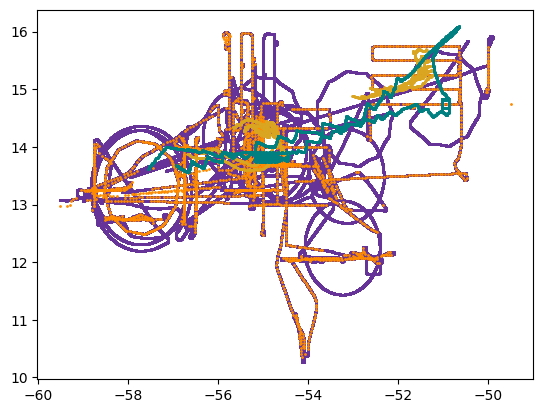

In [15]:
fig, ax = plt.subplots()

ax.scatter(
    p3_ds['lon'],
    p3_ds['lat'],
    color='rebeccapurple',
    s=1,
)
ax.scatter(
    wsra_ds['longitude'],
    wsra_ds['latitude'],
    color='darkorange',
    s=1,
)
ax.scatter(
    swift_ds['lon'],
    swift_ds['lat'],
    color='goldenrod',
    s=1,
)
ax.scatter(
    sd_ds['LON'],
    sd_ds['LAT'],
    color='teal',
    s=1,
)